## 1 Load Data

In [218]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

iris = pd.read_csv('../datasets/iris_full.csv')
X = iris.iloc[:, :4]
y = iris.iloc[:, 4]

X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42,test_size=0.3)


## 2 Model

In [198]:
class LogisticRegressionNumpy():
    def __init__(self,lr,epochs):
        self.__W = None
        self.__losses =[]
        self.__lr = lr 
        self.__epochs = epochs
    def sigmoid_function(self,z):
        return 1 / (1 + np.exp(-z))
    def predict(self,X):
        X = np.hstack((np.ones((X.shape[0],1)), X))
        return self._predict(X)
    def _predict(self,X):
        y_hat = self.sigmoid_function(np.dot(X, self.__W))
        return y_hat
    
    def _computeLoss(self, y_hat,y):
         return (-y*np.log(y_hat) - (1-y)*np.log(1-y_hat)).mean()
        # return ((y_hat-y)*(y_hat-y)).mean()
    
    def _computeGradient(self,X, y_hat, y):
        return np.dot(X.T, (y_hat - y)) /y.size
    
    def _updateWeight(self, gradient):
        return self.__W - (self.__lr * gradient)
    
    def fit(self,X,y):
        self.__W = np.array([0] * (X.shape[1]+1))
        X = np.hstack([np.ones((len(X),1)),X])
        
        for epoch in range(self.__epochs):
            y_hat = self._predict(X)
            loss = self._computeLoss(y_hat,y)
            gradient = self._computeGradient(X,y_hat,y)
            self.__W = self._updateWeight(gradient)
            self.__losses.append(loss)
    def parameters(self):
        return self.__W

    def losses(self):
        return self.__losses
            

## 3 Test with model

In [216]:
accuracy_WHand= []
for i in range (1,100) :
    reg = LogisticRegressionNumpy(lr=0.1,epochs=i)
    reg.fit(X_train,y_train)
    y_true = y_val.to_numpy()
    y_predict = reg.predict(X_val)
    accuracy_WHand.append( accuracy_score(y_true, y_predict.round()))
print(accuracy_WHand)



[0.43333333333333335, 0.43333333333333335, 0.5333333333333333, 0.9333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


## 4 Test with sklean

In [214]:
from sklearn.linear_model import LogisticRegression
accuracy_sklearn= []
for i in range (1,100) :
    model = LogisticRegression(max_iter=i)
    model.fit(X_train,y_train)
    y_true = y_val.to_numpy()
    y_predict = model.predict(X_val)
    accuracy = model.score(X_val, y_val)
    accuracy_sklearn.append(accuracy )
print(accuracy_sklearn)


d:\CNTT\Machine-learning\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\CNTT\Machine-learning\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[0.43333333333333335, 0.43333333333333335, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


## Skleann accuracy

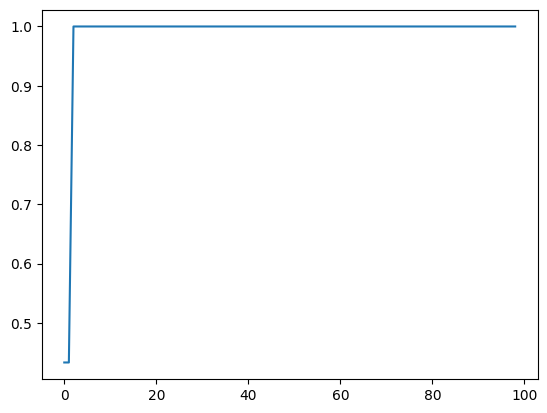

In [215]:
# show figures
plt.plot(accuracy_sklearn)
plt.show()

## Model accuracy

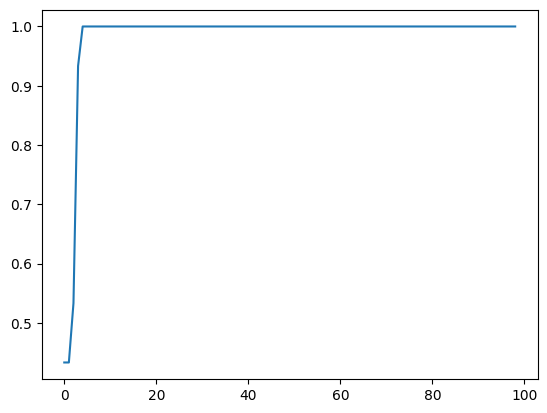

In [217]:
plt.plot(accuracy_WHand)
plt.show()